# Rohin, Wendy - Final Project

06-December-2024

## Art History Highlights

Using a data set from TidyTuesday, I've chosen to create a few vizualizations about how various artists are represented in art history literature and museums over time (1919-2020). First, I created tables to show the distribution of artists by nationality and by gender. The "counts" are the number o appearances in the popular art history texts; Then I created graphs to show the 4 countries with the most artists and the distribution of artists by gender.  The second graph shows how the majority of artists recognized by art historians are male gender. 

The final table and chart focus on Pablo Picasso's appearances at the Museum of Modern Art from 1970-to 2020. The graph shows the cumulative appearances for each year recorded in the data set. The relatively steady slope line shows that his popularity or demand by museum patrons has not declined over the last fifty years. 

From the author of the data set, "jonthegeek":
"This dataset contains data that was used for Holland Stam's thesis work, titled Quantifying art historical narratives. The data was collected to assess the demographic representation of artists through editions of Janson's History of Art and Gardner's Art Through the Ages, two of the most popular art history textbooks used in the American education system. In this package specifically, both artist-level and work-level data was collected along with variables regarding the artists' demographics and numeric metrics for describing how much space they or their work took up in each edition of each textbook.""

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv'
art=read_csv(url)

Rows: 3162 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): artist_name, artist_nationality, artist_nationality_other, artist_g...
dbl (6): edition_number, year, space_ratio_per_page_total, artist_unique_id,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
art |> 
    select(artist_nationality, artist_gender) |>
    mutate(count=n()) |>
           head()

artist_nationality,artist_gender,count
<chr>,<chr>,<int>
American,Male,3162
American,Male,3162
American,Male,3162
American,Male,3162
American,Male,3162
American,Male,3162


In [4]:
table <- art |> 
    select(artist_nationality, artist_gender) |>
    mutate(count=n()) |>
           head()

In [5]:
art |> 
group_by(artist_nationality) |> 
summarize(count = n()) |> 
arrange(desc(count)) |> 
top_n(4, wt = count) |> 
pull(artist_nationality) 


[1] "American" "French"   "British"  "German"

In [6]:
top_nationalities <- art |> 
group_by(artist_nationality) |> 
summarize(count = n()) |> 
arrange(desc(count)) |> 
top_n(4, wt = count) |> 
pull(artist_nationality) 

In [7]:
art |>
    filter(artist_nationality %in% top_nationalities) |>
head()


artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Aaron Douglas,9,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3533658,2,0,0,Non-White
Aaron Douglas,10,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3739470,2,0,0,Non-White
Aaron Douglas,11,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3032593,2,0,0,Non-White
Aaron Douglas,12,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3770489,2,0,0,Non-White
Aaron Douglas,13,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3984097,2,0,0,Non-White
Aaron Douglas,14,2013,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.4528686,2,0,0,Non-White


In [8]:
filtered_top <- art |>
    filter(artist_nationality %in% top_nationalities) 


TABLE 1: Top 4 Coutries with the Most Published Artists by Gender: 1919-2020

In [9]:
filtered_top |> 
drop_na() |>
group_by(artist_nationality, artist_gender) |> 
summarize(count = n(), .groups = 'drop') |> 
pivot_wider(names_from = artist_gender, values_from = count, values_fill = list(count = 0)) 

artist_nationality,Female,Male
<chr>,<int>,<int>
American,178,718
British,23,294
French,43,827
German,33,223


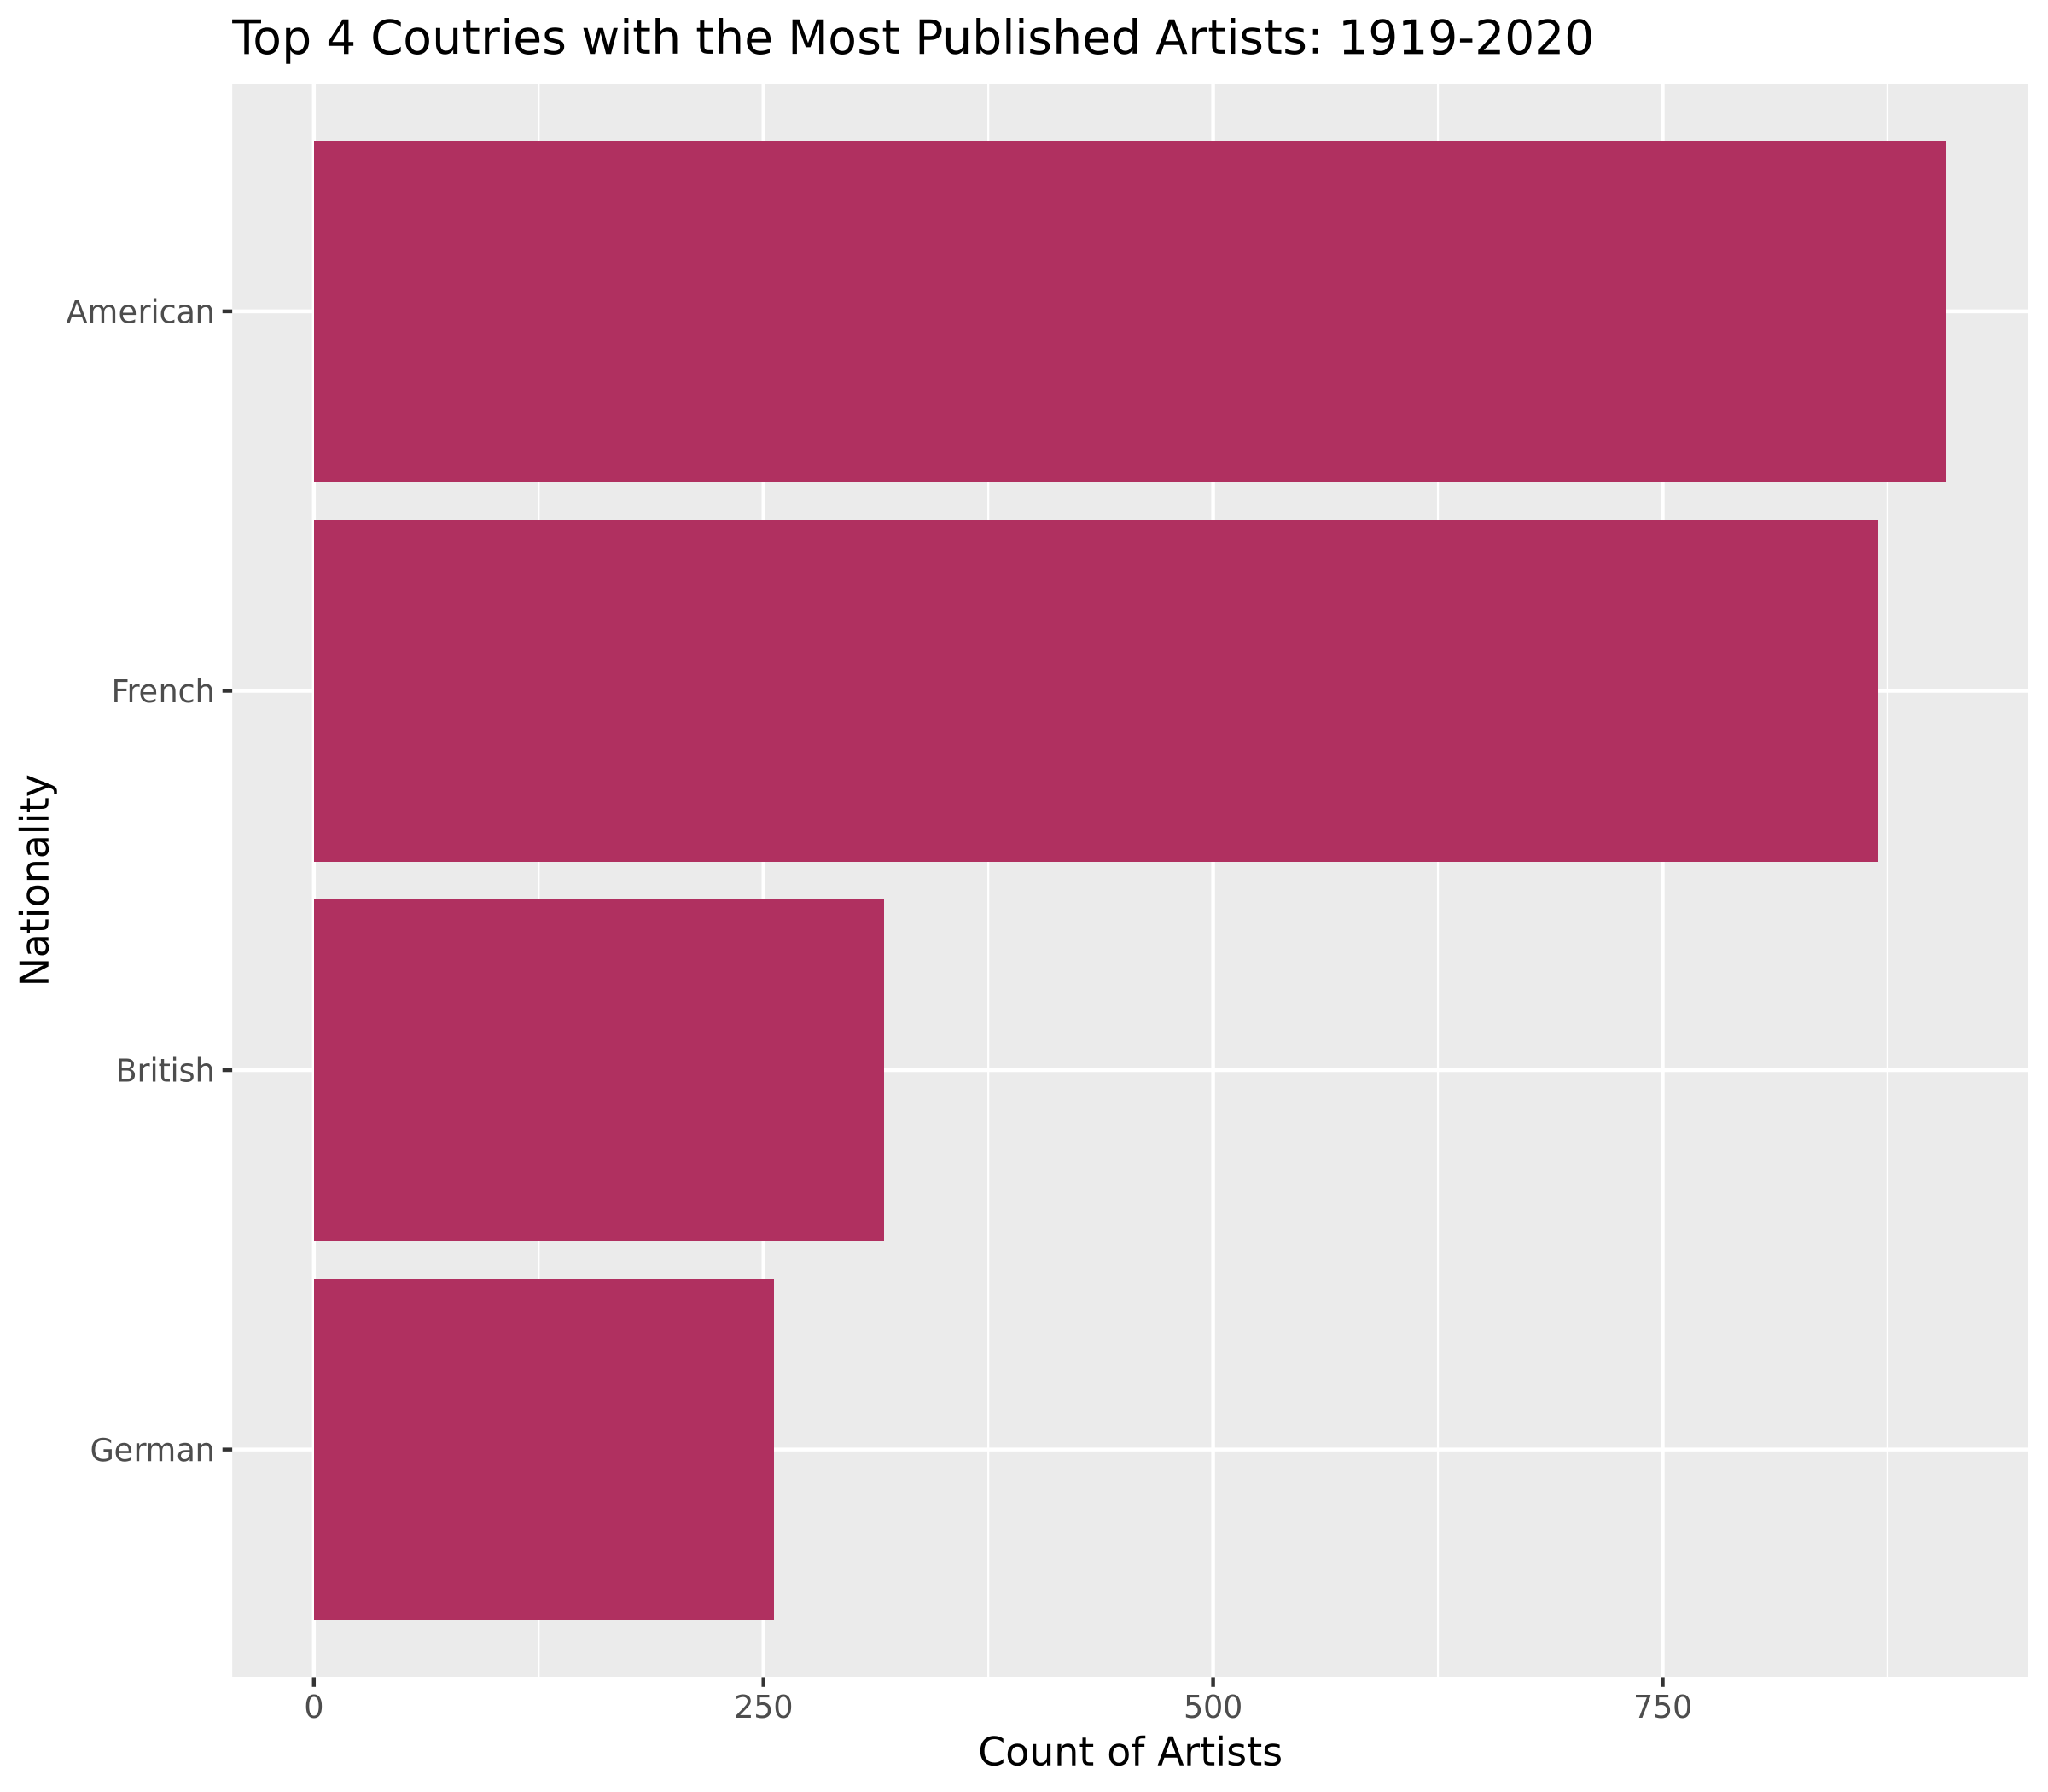

In [10]:
options(repr.plot.width=8, repor.plot.height = 1, repr.plot.res = 300)
filtered_top |>
mutate(artist_nationality_sorted = artist_nationality %>% fct_infreq() %>% fct_rev()) |>
       
ggplot(aes(y=artist_nationality_sorted)) + geom_bar(na.rm=TRUE, fill='maroon') +
    labs(title="Top 4 Coutries with the Most Published Artists: 1919-2020", x="Count of Artists", y="Nationality", fill="Gender")

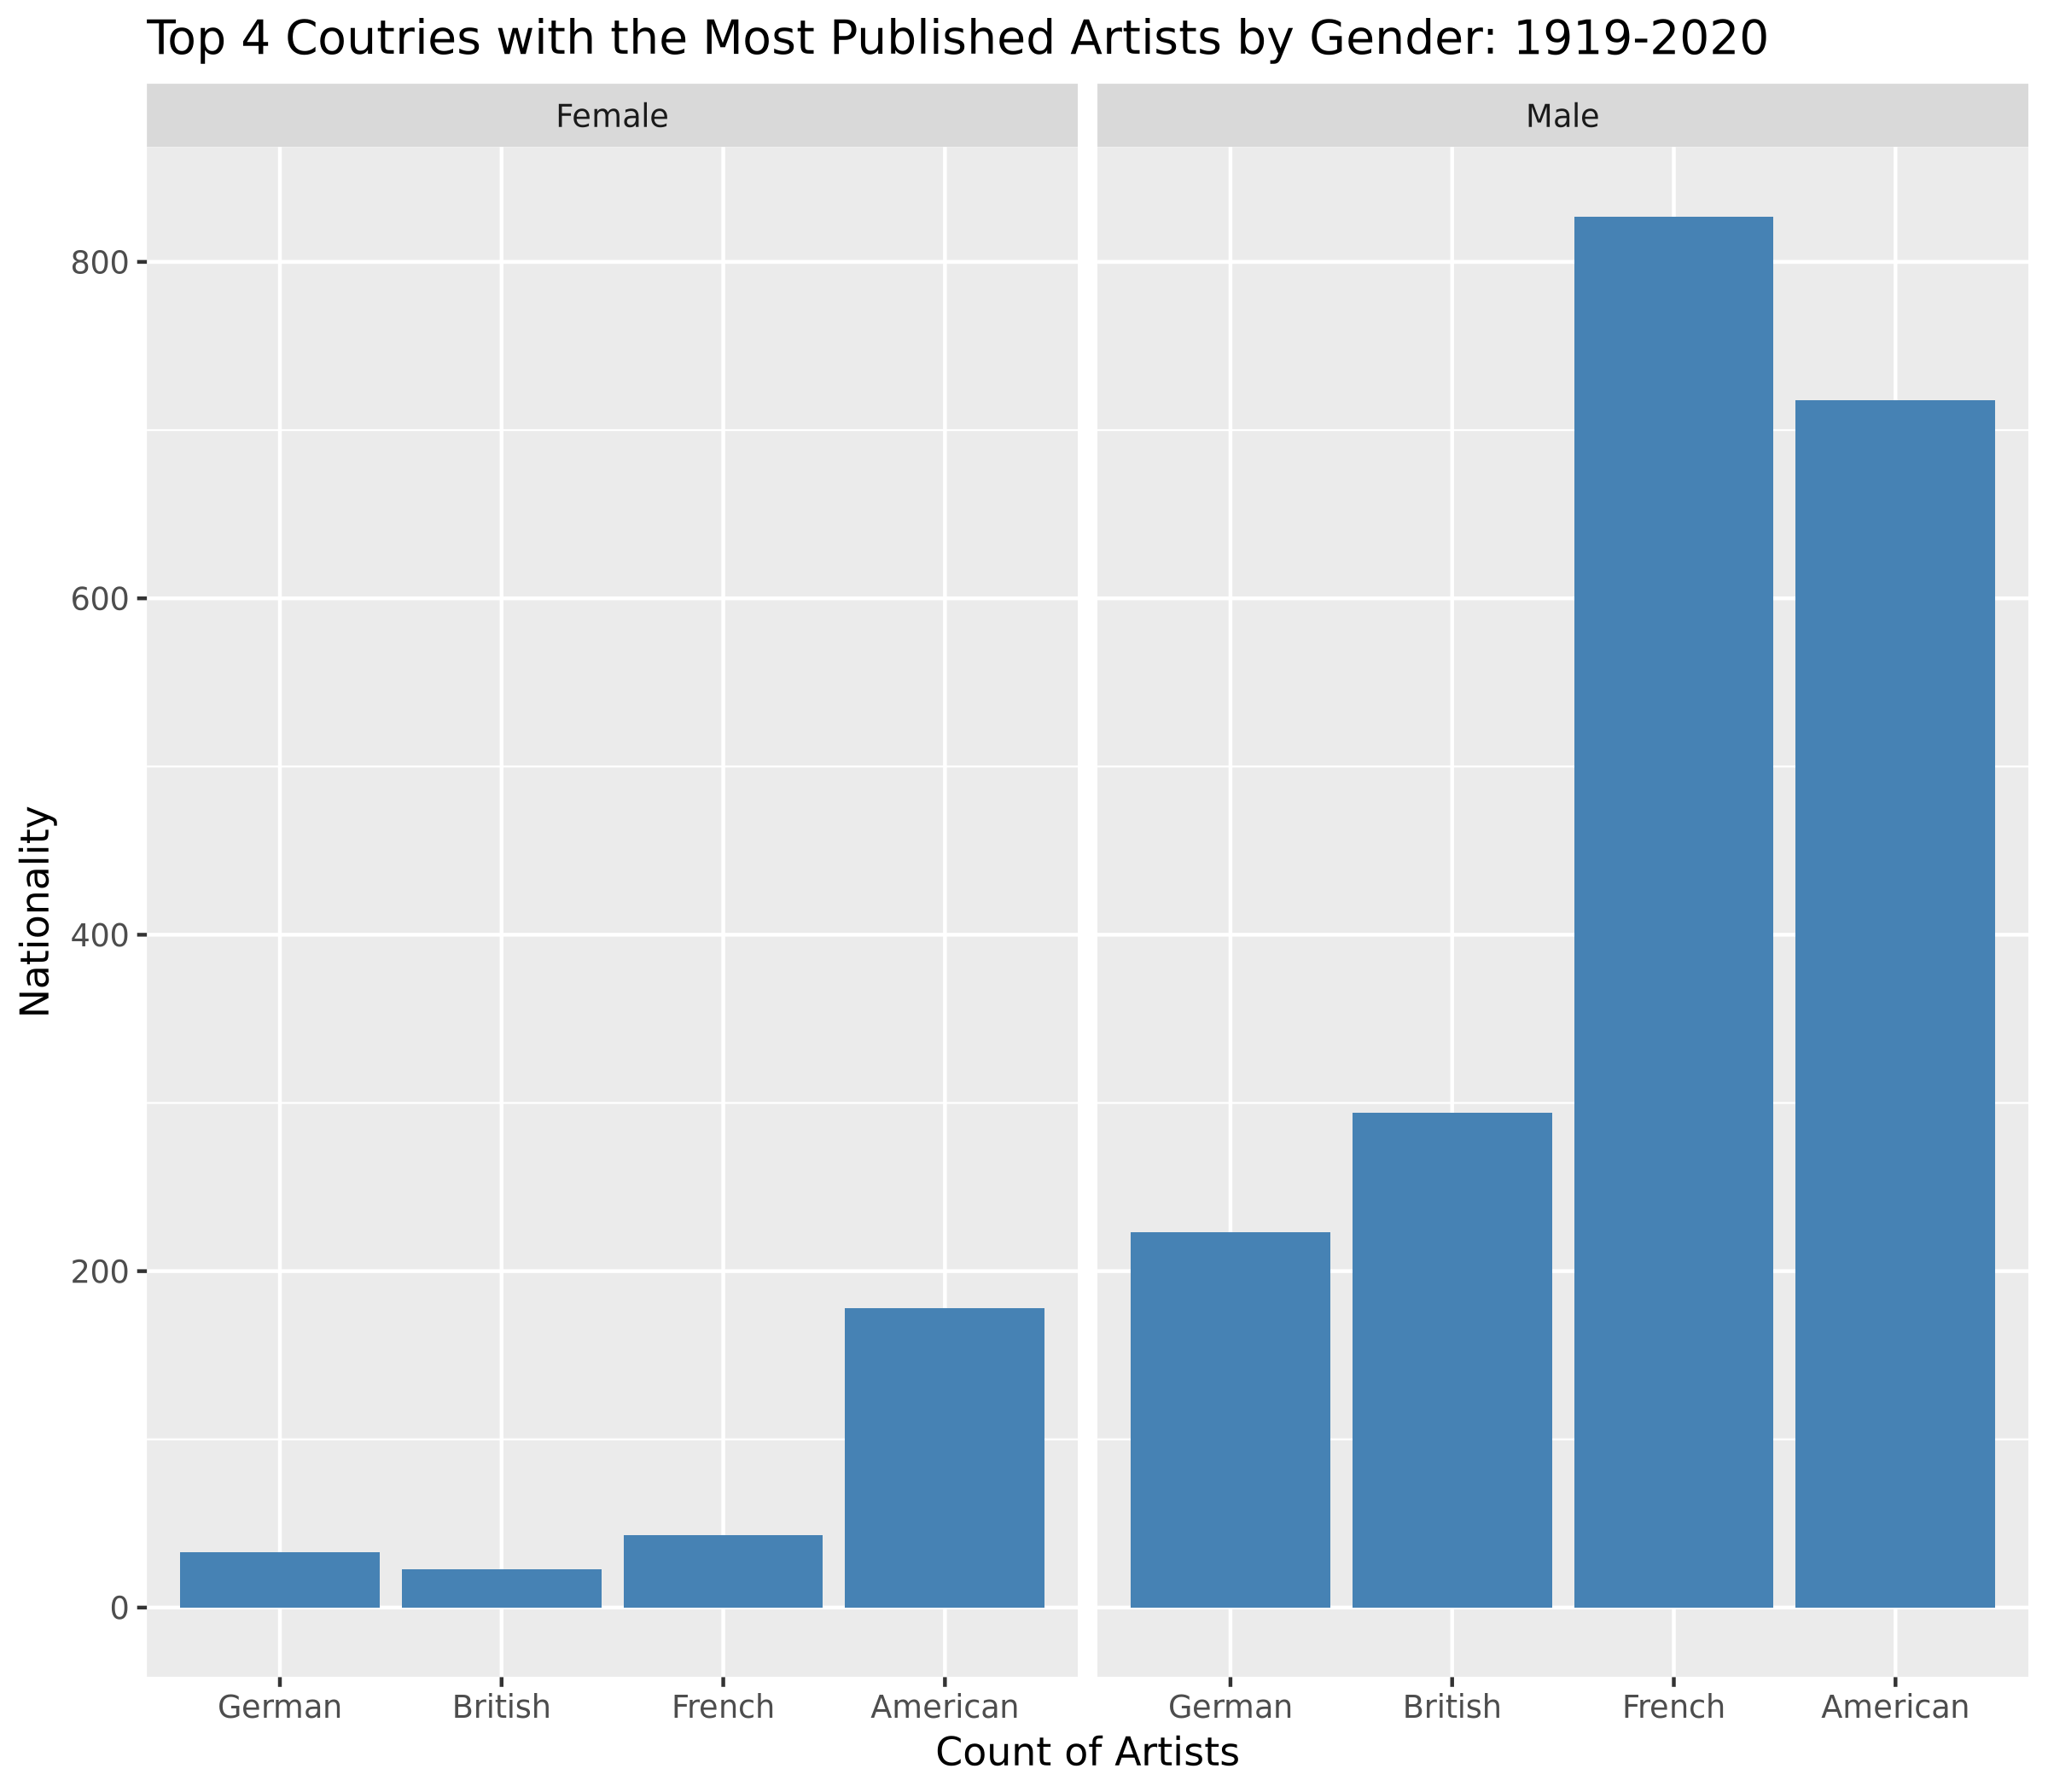

In [11]:
options(repr.plot.width=8, repor.plot.height = 1, repr.plot.res = 300)
filtered_top |>
mutate(artist_nationality_sorted = artist_nationality %>% fct_infreq() %>% fct_rev()) |>
drop_na() |>

ggplot(aes(x=artist_nationality_sorted)) + geom_bar(na.rm=TRUE, fill='steelblue') + facet_wrap(~artist_gender, nrow= 1) +
    labs(title="Top 4 Coutries with the Most Published Artists by Gender: 1919-2020", x="Count of Artists", y="Nationality")


In [12]:
art |>
    
    filter(year>=1970, artist_name=="Pablo Picasso") |>
    arrange(year) |> 
    #slice(1:5) |>
    select(year, artist_name, moma_count_to_year) 
   
           

year,artist_name,moma_count_to_year
<dbl>,<chr>,<dbl>
1970,Pablo Picasso,14
1975,Pablo Picasso,18
1977,Pablo Picasso,18
1980,Pablo Picasso,20
1986,Pablo Picasso,23
1986,Pablo Picasso,23
1991,Pablo Picasso,24
1991,Pablo Picasso,24
1995,Pablo Picasso,28


In [13]:
library('ggrepel')

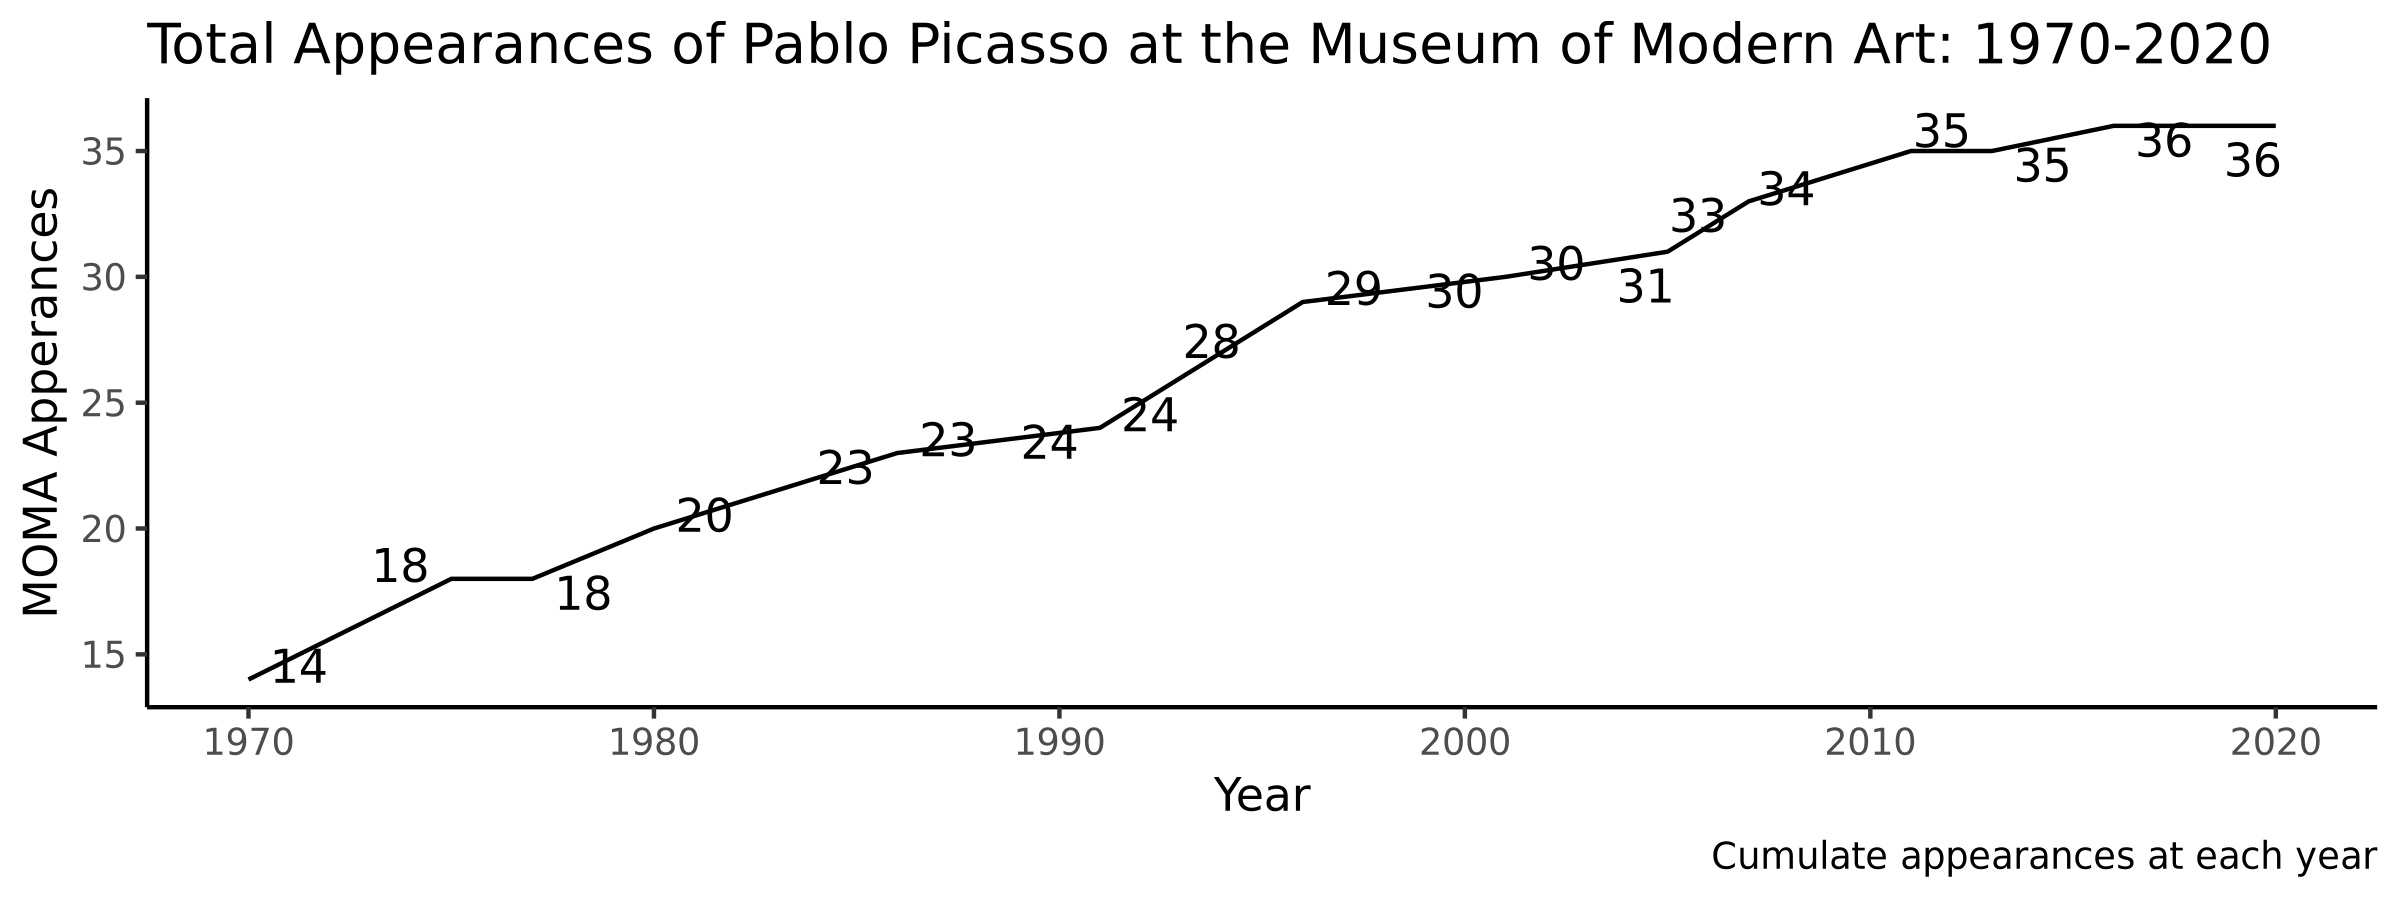

In [14]:
options(repr.plot.width=8, repr.plot.height =3 )
art |>
    
    filter(year>=1970, artist_name=="Pablo Picasso") |>
    arrange(year) |> 
    select(year, artist_name, moma_count_to_year) |>
ggplot(aes(x=year, y=moma_count_to_year)) + geom_line()  +
    geom_text_repel(aes(label=moma_count_to_year)) + theme_classic() +
    labs(title="Total Appearances of Pablo Picasso at the Museum of Modern Art: 1970-2020", y="MOMA Apperances", x="Year", caption="Cumulate appearances at each year")

THE END